In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from highlight_text import fig_text

pd.options.display.max_columns = 500
%matplotlib inline

In [2]:
path = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\'

In [138]:
df = pd.read_csv(f"{path}Final FBRef 2022-2023.csv")

In [139]:
df.head(1)

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,G+A,Glsxx,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xAG,xA,A-xAG,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,Switches,Crs,ThrowIn,CK,InSwingCK,OutSwingCK,StrCK,Cmpxxx,PassesToOff,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,Tkl,TklWinPoss,Def3rdTkl,Mid3rdTkl,Att3rdTkl,DrbTkl,DrbPastAtt,DrbTkl%,DrbPast,Blocks,ShBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,AttDrb,SuccDrb,DrbSucc%,TimesTackled,TimesTackled%,Carries,TotalCarryDistance,ProgCarryDistance,ProgCarries,CarriesToFinalThird,CarriesToPenArea,CarryMistakes,Disposesed,ReceivedPass,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,G+APer90,GlsxxPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAGPer90,xAPer90,A-xAGPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,SwitchesPer90,CrsPer90,ThrowInPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,CmpxxxPer90,PassesToOffPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,SCAPassLivePer90,SCAPassDeadPer90,SCADribPer90,SCAShPer90,SCAFldPer90,SCADefPer90,GCAPer90,GCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,TklPer90,TklWinPossPer90,Def3rdTklPer90,Mid3rdTklPer90,Att3rdTklPer90,DrbTklPer90,DrbPastAttPer90,DrbTkl%Per90,DrbPastPer90,BlocksPer90,ShBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,AttDrbPer90,SuccDrbPer90,DrbSucc%Per90,TimesTackledPer90,TimesTackled%Per90,CarriesPer90,TotalCarryDistancePer90,ProgCarryDistancePer90,ProgCarriesPer90,CarriesToFinalThirdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,ReceivedPassPer90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjPassBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Aaron Cresswell,eng ENG,DF,West Ham,eng Premier League,33,1989,28,24,2235.0,1.0,0.0,0.0,9.0,1.0,11.1,0.36,0.04,0.0,0.0,22.5,4.0,0.0,0.0,0.3,0.3,0.04,-0.3,-0.3,1127.0,1448.0,77.8,18285.0,8587.0,626.0,670.0,93.4,387.0,497.0,77.9,100.0,206.0,48.5,1.0,3.7,2.9,-2.7,40.0,91.0,28.0,15.0,145.0,1157.0,288.0,40.0,1.0,5.0,133.0,192.0,56.0,5.0,44.0,1.0,1127.0,3.0,35.0,73.0,2.94,43.0,27.0,0.0,2.0,1.0,0.0,1.0,0.04,0.0,1.0,0.0,0.0,0.0,0.0,21.0,11.0,12.0,7.0,2.0,12.0,31.0,38.7,19.0,21.0,11.0,10.0,27.0,48.0,56.0,0.0,1607.0,97.0,507.0,668.0,438.0,13.0,1607.0,7.0,2.0,28.6,4.0,57.1,766.0,3497.0,1751.0,35.0,26.0,1.0,6.0,6.0,960.0,82.0,3.0,0.0,0.0,9.0,9.0,2.0,0.0,0.0,0.0,120.0,28.0,27.0,50.9,0.040268,0.0,0.0,0.362416,0.040268,0.44698,0.01449

In [141]:
wingers = df[(df['Main Position'].str.contains('Right Midfield')) | 
                (df['Main Position'].str.contains('Left Midfield')) |
                (df['Main Position'].str.contains('Left Winger')) |
                (df['Main Position'].str.contains('Right Winger'))]

wingers = wingers[["Player","Pos", "Main Position", "Squad", "ShortPassCmp%", "MedPassCmp%", "LongPassCmp%",
                   "KeyPasses", 'xA','Assists', 'SCA', 'GCA', 'ProgPasses','pAdjIntPer90', 'pAdjDrbTklPer90']].reset_index(drop=True)

In [142]:
bgColor = "lightgrey"
playerColor = "#0052CC"

In [143]:
params = list(wingers.columns)
params = params[4:]

In [144]:
def playerChart(playerName, save=False):
    player = wingers.loc[wingers["Player"]== playerName].reset_index()
    player = list(player.loc[0])
    player = player[5:]
    

    values = []
    for x in range(len(params)):
        values.append(math.floor(stats.percentileofscore(wingers[params[x]],player[x])))

    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color=bgColor,     # background color
        straight_line_color="#222222",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        last_circle_color="#222222",    # color of last circle
        other_circle_ls="-.",           # linestyle for other circles
        other_circle_lw=1               # linewidth for other circles
)

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                     # list of values
    
        figsize=(8, 8),             # adjust figsize according to your need
        kwargs_slices=dict(
            facecolor=playerColor, edgecolor="#222222",
            zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    
        kwargs_params=dict(
            color="#000000", fontsize=10.5,
             va="center"
    ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
             zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
        kwargs_compare_values=dict(
            color="#000000", fontsize=12,  zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

    # add title
    fig_text(
        0.515, 0.99, f"<{playerName}>", size=25, fig=fig,
        highlight_textprops=[{"color": playerColor}],
        ha="center", color="#000000"
)


    # add subtitle
    fig.text(
        0.515, 0.930,
        "Percentile Rank vs Top 5 Wingers | Season 2022-23",
        size=15,
        ha="center",  color="#000000"
)

    # add credits
    CREDIT_1 = "data: Opta viz fbref"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
         color="#000000",
        ha="right"
)

    if save ==True:
        plt.savefig(f'viz/{playerName} Chart vs Premier League Midfielders 2022-23', dpi=300, bbox_inches='tight')
    else:
        plt.show()

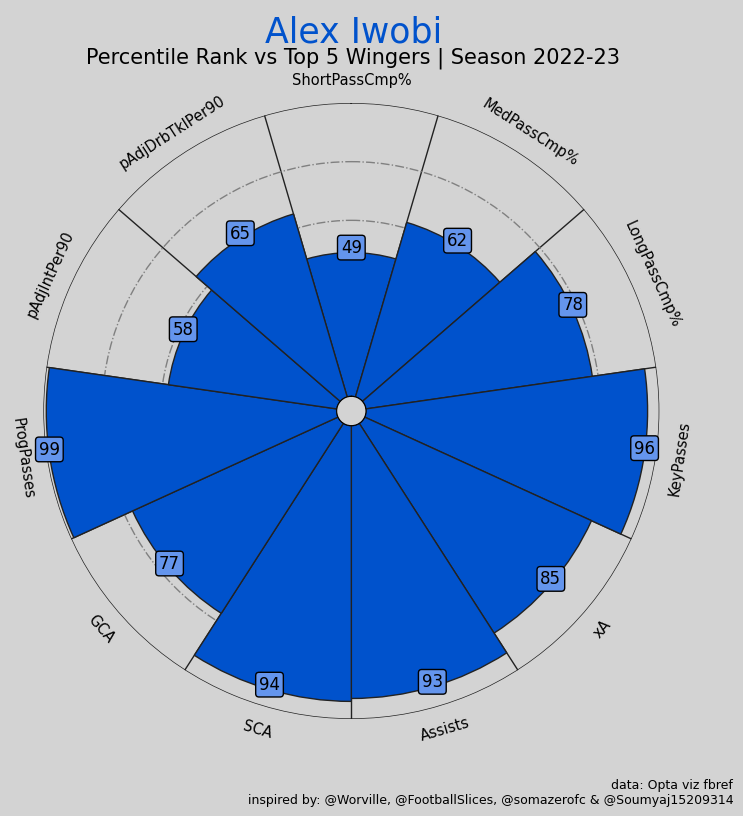

In [146]:
playerChart("Alex Iwobi")